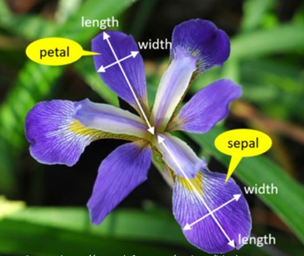

**Step 1**: Import Necesary Libraries for Easier Work


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

**Step 2**: Load the dataset

In [2]:
url = 'https://raw.githubusercontent.com/bumperr/CodeX/main/Iris.csv'

iris_dataset = pd.read_csv(url) #load the dataset int

To get to know your data, you can use this command to view example row in dataset. You can see that the dataset consist of 5 keys value  (column value) namely '**Id**', '**SepalLengthCm**', '**SepalWidthCm**', '**PetalLengthCm**' , '**PetalWidthCm**', '**Species**'. You can also familiarize with each Keys datatype and its formatting.

In [3]:
iris_dataset.head(2) #show the first 2 rows from the dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


**Step 3**: Identification And Processing of Data

This involves checking for null values, understanding data types, identifying outliers, and exploring unique values in categorical columns.

In [4]:
iris_dataset.info()
print('=='*20,'\n\n')
iris_dataset.isnull().sum()
#checking if there is any inconsistency in the dataset
#as we see there are no null values in the dataset, so the data can be processed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB




Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: xlabel='PetalWidthCm'>

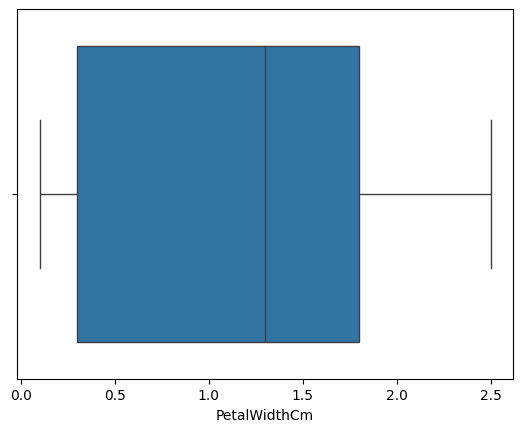

In [5]:
sns.boxplot(x=iris_dataset['PetalWidthCm']) # example of looking the range of data value in the set

Research on Box Plot to understand its potential


Remove Unecessary Column in the Consideration.

In [6]:
iris_dataset.drop('Id',axis=1,inplace=True) #dropping the Id column as it is unecessary,
# axis=1 specifies that it should be column wise, inplace =1 means the changes should be reflected into the dataframe

Modifiying the data to show how to manipulate the data into your liking . This example I will simplify the data in the species column from 'Iris-xxxxx' to just 'xxxx'

In [7]:
iris_dataset['Species'] = iris_dataset['Species'].str.replace('Iris-', '')
iris_dataset.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


**Step 4**:Explore and understand the data behaviour

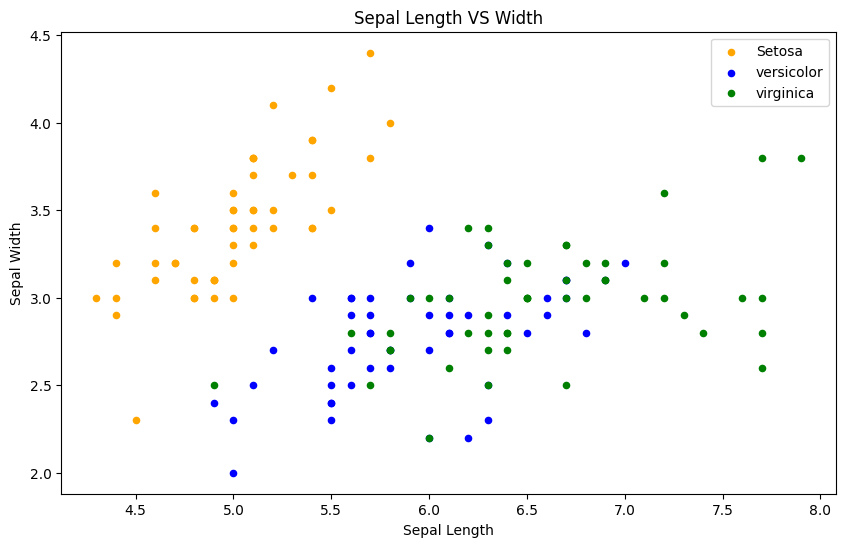

In [8]:
#Relationship between Sepal Length and Width
fig = iris_dataset[iris_dataset.Species=='setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris_dataset[iris_dataset.Species=='versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris_dataset[iris_dataset.Species=='virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

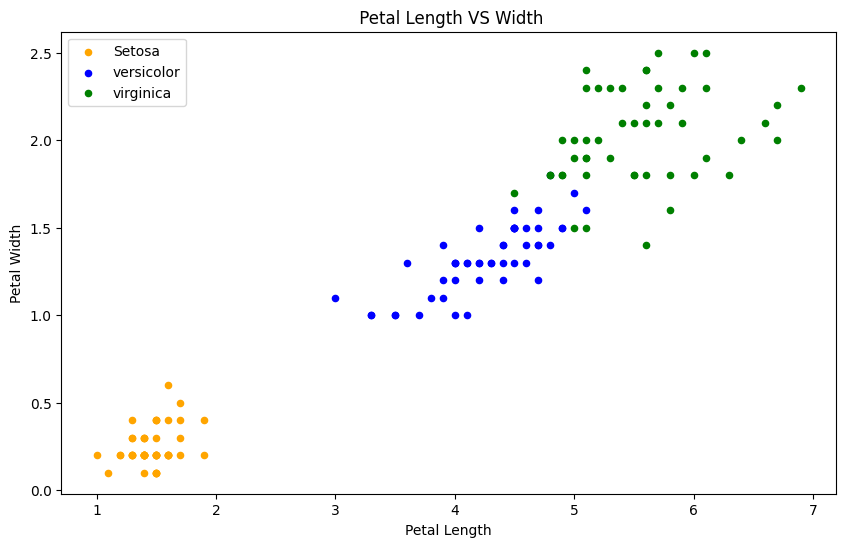

In [9]:
fig = iris_dataset[iris_dataset.Species=='setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris_dataset[iris_dataset.Species=='versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris_dataset[iris_dataset.Species=='virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal. We will check that later

*Now let us see how are the length and width are distributed*

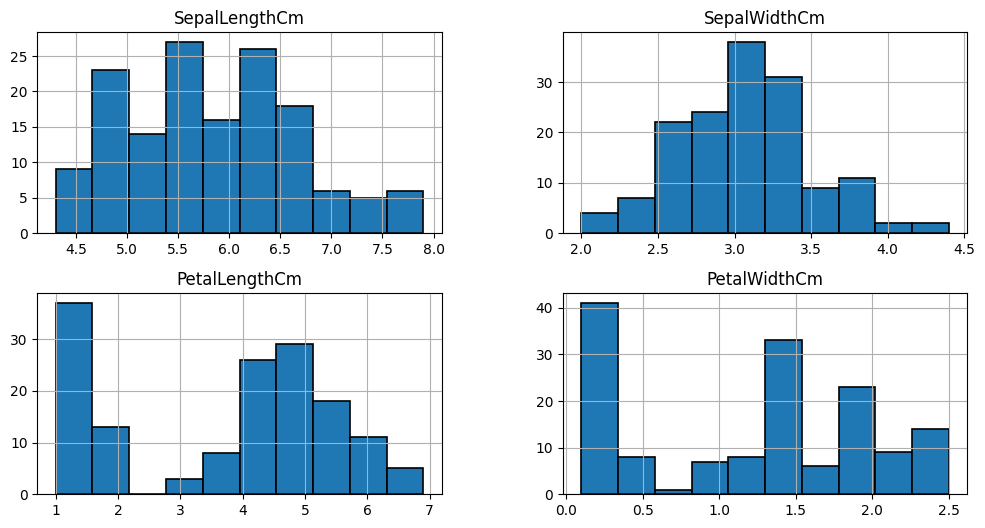

In [10]:
iris_dataset.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

*Now let us see how the length and width vary according to the species*

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

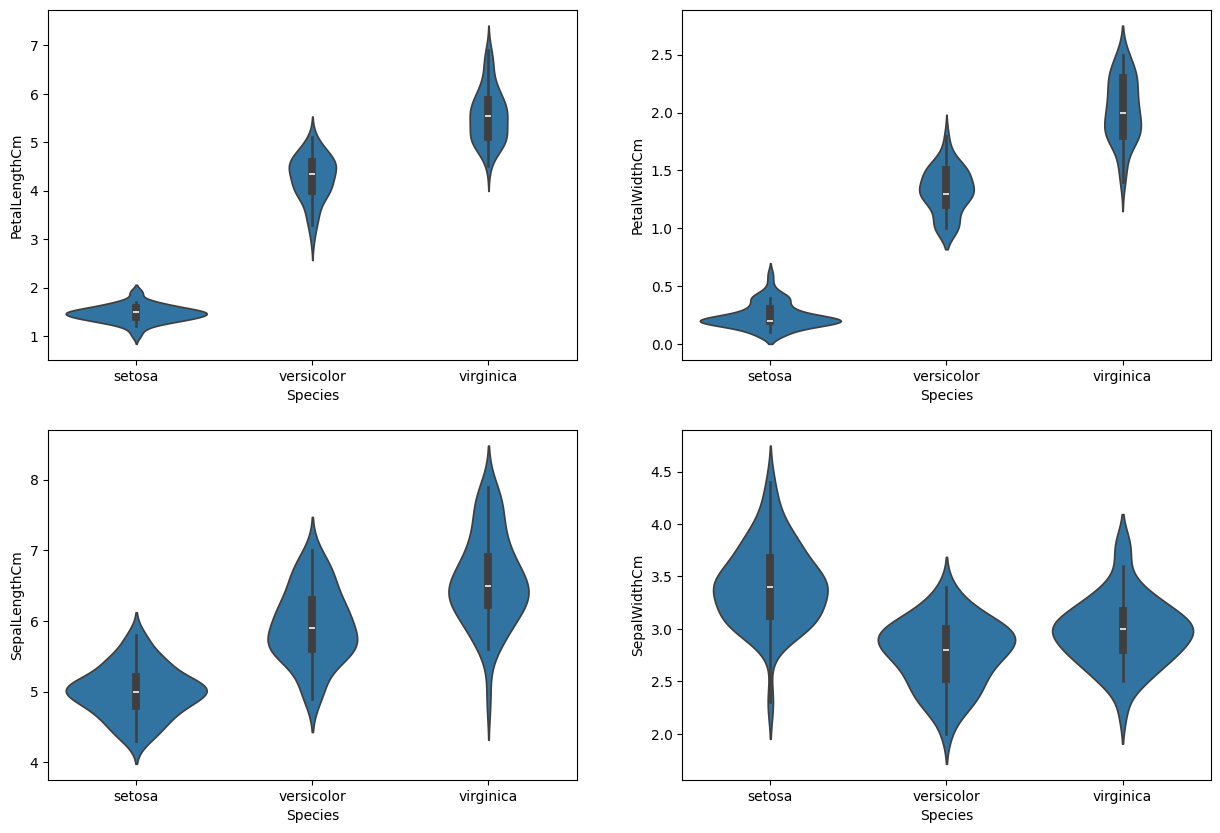

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris_dataset)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris_dataset)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris_dataset)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris_dataset)

The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density

FROM THIS POINT, WE WILL USE A USEFUL PYTHON LIBRARIES CALEED SCIKIT-LEARN THAT HAVE BUILT IN FUNCTIONALITY TO SPLIT THE DATA, APPLY COMPLEX ML ALGORITHM AND TEST OUT OUR MODEL

In [12]:
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

**Step 5**: Evaluate features correlation


Now the given problem is a **classification problem**.. Thus we will be using the classification algorithms to build a model.

**Classification**: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data

**Regression**: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

Before we start, we need to clear some ML notations.

**attributes**-->An attribute is a property of an instance that may be used to determine its classification. In the following dataset, the attributes are the petal and sepal length and width. It is also known as Features.

**Target variable**, in the machine learning context is the variable that is or should be the output. Here the target variables are the 3 flower species.

Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation

<ipython-input-13-0a138e8cebd1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris_dataset.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris_dataset.corr())


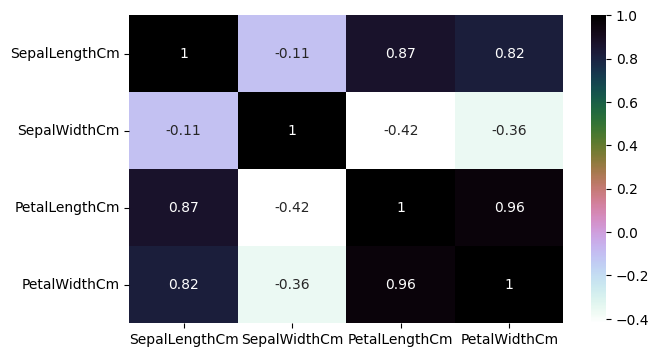

In [13]:
plt.figure(figsize=(7,4))                 #cmap is colour mapping
sns.heatmap(iris_dataset.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris_dataset.corr())
plt.show()

**Observation**--->

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.


---


Steps To Be followed When Applying an Algorithm

1.   Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.
2.   Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
3.Then pass the training dataset to the algorithm to train it. We use the .fit() method
4.Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.
We then check the accuracy by passing the predicted outcome and the actual output to the model.

**Step 6**: Splitting The Data into Training And Testing Dataset

One part of the
data is used to build our machine learning model, and is called the training data or
training set. The rest of the data will be used to assess how well the model works; this
is called the test data, test set, or hold-out se

In [14]:
train, test = train_test_split(iris_dataset, test_size = 0.3, random_state=2)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape) # (105 row , 5 column)
print(test.shape)

(105, 5)
(45, 5)


In [15]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species   #output value of test data

**Step 7**: Selecting algorithm for the dataset

Since there are many classification algorithm readily available in the libraries, we will go through win K-Nearest Neighbor algorithm first before using other and evaluate each model in the solution. https://www.youtube.com/watch?v=0p0o5cmgLdE&ab_channel=IntuitiveMachineLearning

In [16]:
model=KNeighborsClassifier(n_neighbors=3) #this parameter is a tuning parameter
 #this examines 3 neighbours for putting the new data into a class

**Step 8:** Training the model

You may think that the code for this part will be long, but with the help of the libraries, it is far more easier than your intuition

In [17]:
model.fit(train_X,train_y) # model refers to the selected algorithm

KNeighborsClassifier(n_neighbors=3)

**Step 9**: Evaluating the model

Since we have trained our machine with the model that we chose, we can ask the machine to predict unseen values and determine the categories using .predict()

In [ ]:
prediction=model.predict(test_X)#now we pass the testing data to the trained algorithm
print('The accuracy of the KNN is:',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is: 1.0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
# Classification Report
class_report = classification_report(test_y, prediction, target_names=iris_dataset['Species'].unique())
print('Classification Report:\n', class_report)

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(test_y, prediction)
conf_matrix_df = pd.DataFrame(conf_matrix, index=iris_dataset['Species'].unique(), columns=iris_dataset['Species'].unique())

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Visualizing what really happens....

In [ ]:
comparison_df = pd.DataFrame({
    'Actual Values': test_y,
    'Predicted Values': prediction
})

# Print the DataFrame
print(comparison_df.head(10))

    Actual Values Predicted Values
6          setosa           setosa
3          setosa           setosa
113     virginica        virginica
12         setosa           setosa
24         setosa           setosa
129     virginica        virginica
25         setosa           setosa
108     virginica        virginica
128     virginica        virginica
45         setosa           setosa


Let see  accuracy for various values of n for K-Nearest nerighbours

In [ ]:
a_index = list(range(1, 11))
a = []

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    accuracy = metrics.accuracy_score(prediction, test_y)
    a.append(accuracy)

plt.plot(a_index, a)
plt.xticks(x)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Neighbors')
plt.show()

# **Using other classification algorithm**

Support Vector Machine (SVM) https://www.youtube.com/watch?v=_YPScrckx28&ab_channel=VisuallyExplained

In [ ]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm.
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 0.9777777777777777


Logistic regression https://www.youtube.com/watch?v=EKm0spFxFG4&ab_channel=3-MinuteDataScience

In [ ]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9777777777777777


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree https://www.youtube.com/watch?v=JcI5E2Ng6r4&t=93s&ab_channel=IntuitiveMachineLearning

In [ ]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9555555555555556


**Bonus step**: experiment with different subset of data, mix and match

We used all the features of iris in above models. Now we will use Petals and Sepals Seperately
Creating Petals And Sepals Training Data

In [ ]:
petal_dataset=iris_dataset[['PetalLengthCm','PetalWidthCm','Species']]
sepal_dataset=iris_dataset[['SepalLengthCm','SepalWidthCm','Species']]

Splitting the datasets intro training and test

In [ ]:
train_p,test_p=train_test_split(petal_dataset,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p=test_p.Species


train_s,test_s=train_test_split(sepal_dataset,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species

Support Vector Machine

In [ ]:
model=svm.SVC() #petal
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC() # sepal
model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


Decision Tree

In [ ]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6666666666666666


K-Nearest Neighbours

In [ ]:
model=KNeighborsClassifier(n_neighbors=3)
model.fit(train_x_p,train_y_p)
prediction=model.predict(test_x_p)
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s)
prediction=model.predict(test_x_s)
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333




---

**Observations**:
Using Petals over Sepal for training the data gives a much better accuracy.

This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.

Thus we have just implemented some of the common Machine Learning for classification. Since the dataset is small with very few features, I didn't cover some concepts as they would be relevant when we have many features.